### Installing required libraries

In [ ]:
pip install nixtla==0.5.2 numpy==1.24.4  scikit-learn==1.3.2 matplotlib==3.7.1 pandas==2.1.4

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from nixtla import NixtlaClient
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

Create calculate error metrics function which helps in assessing the performance of the trained model

In [ ]:

def calculate_error_metrics(actual, predicted, num_predictors=1):
    # convert inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    # Number of observations
    n = len(actual)
    # Calculate MSE
    mse = mean_squared_error(actual, predicted)
    # Calculate RMSE
    rmse = np.sqrt(mse)
    # Calculate MAPE
    mape = mean_absolute_percentage_error(actual, predicted)
    # Calculate R-squared
    r2 = r2_score(actual, predicted)
    # Calculate Adjusted R-squared
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - num_predictors - 1))
    print(f'MSE : {mse}')
    print(f'RMSE : {rmse}')
    print(f'MAPE : {mape}')
    print(f'r2 : {r2}')
    print(f'adjusted_r2 : {adjusted_r2}')

Setting up your API key

Copy and paste your key directly into your Python code



In [ ]:
nixtla_client = NixtlaClient(
    api_key = ''
)

Validate your API key

check the status of your API key, use the validate_api_key method of the NixtlaClient class. This method will return True if the API key is valid and False otherwise.

In [ ]:
nixtla_client.validate_api_key()

True

Load **Bike sharing** dataset

Split data into **train** and **test**

In [ ]:
#https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
# To load local csv  > modify to the right path where the file is present
Y_df = pd.read_csv('Bike_sharing_systems.csv')
Y_df.drop(columns=['instant','casual','cnt'], axis =1, inplace =True)
Y_df.rename(columns={'dteday':'ds','registered':'y'}, inplace=True)
Y_df.head()

,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,y
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,654
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,670
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1229
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1454
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1518


In [ ]:
Y_train_df = Y_df.iloc[:-24,:]
Y_test_df = Y_df.iloc[-24:,:]

Using test data lets remove 'y' variable and make it a dataframe containing future exogenous variables for the defined horizon

In [ ]:
Y_test_df_w_y = Y_test_df.copy()
Y_test_df.drop(columns=['y'], axis =1, inplace =True)
Y_test_df_wo_y = Y_test_df

<ipython-input-30-b724e477ae0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test_df.drop(columns=['y'], axis =1, inplace =True)


With target variable

In [ ]:
Y_test_df_w_y

,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,y
707,2012-12-08,4,1,12,0,6,0,2,0.381667,0.389508,0.911250,0.101379,4429
708,2012-12-09,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,2787
709,2012-12-10,4,1,12,0,1,1,2,0.435833,0.435575,0.925000,0.190308,4841
710,2012-12-11,4,1,12,0,2,1,2,0.353333,0.338363,0.596667,0.296037,5219
711,2012-12-12,4,1,12,0,3,1,2,0.297500,0.297338,0.538333,0.162937,5009
712,2012-12-13,4,1,12,0,4,1,1,0.295833,0.294188,0.485833,0.174129,5107
713,2012-12-14,4,1,12,0,5,1,1,0.281667,0.294192,0.642917,0.131229,5182
714,2012-12-15,4,1,12,0,6,0,1,0.324167,0.338383,0.650417,0.106350,4280
715,2012-12-16,4,1,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742,3248
716,2012-12-17,4,1,12,0,1,1,2,0.393333,0.401500,0.907083,0.098258,4373


Without target variable

In [ ]:
Y_test_df_wo_y

,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
707,2012-12-08,4,1,12,0,6,0,2,0.381667,0.389508,0.911250,0.101379
708,2012-12-09,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975
709,2012-12-10,4,1,12,0,1,1,2,0.435833,0.435575,0.925000,0.190308
710,2012-12-11,4,1,12,0,2,1,2,0.353333,0.338363,0.596667,0.296037
711,2012-12-12,4,1,12,0,3,1,2,0.297500,0.297338,0.538333,0.162937
712,2012-12-13,4,1,12,0,4,1,1,0.295833,0.294188,0.485833,0.174129
713,2012-12-14,4,1,12,0,5,1,1,0.281667,0.294192,0.642917,0.131229
714,2012-12-15,4,1,12,0,6,0,1,0.324167,0.338383,0.650417,0.106350
715,2012-12-16,4,1,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742
716,2012-12-17,4,1,12,0,1,1,2,0.393333,0.401500,0.907083,0.098258


Calling forecast method

In [ ]:
timegpt_fcst_ex_vars_df = nixtla_client.forecast(df=Y_train_df, X_df=Y_test_df_wo_y, h=24,)
timegpt_fcst_ex_vars_df.head()

,ds,TimeGPT
0,2012-12-08,3986.070068
1,2012-12-09,2798.701172
2,2012-12-10,4718.244629
3,2012-12-11,5315.483887
4,2012-12-12,5794.339844


Check how good model works on test data

In [ ]:
calculate_error_metrics(Y_test_df_w_y[['y']],timegpt_fcst_ex_vars_df['TimeGPT'])

MSE : 2598206.886045963
RMSE : 1611.895432726938
MAPE : 0.9761389720503738
r2 : 0.05391699593098909
adjusted_r2 : 0.010913223018761298


Plot Actual vs Predicted

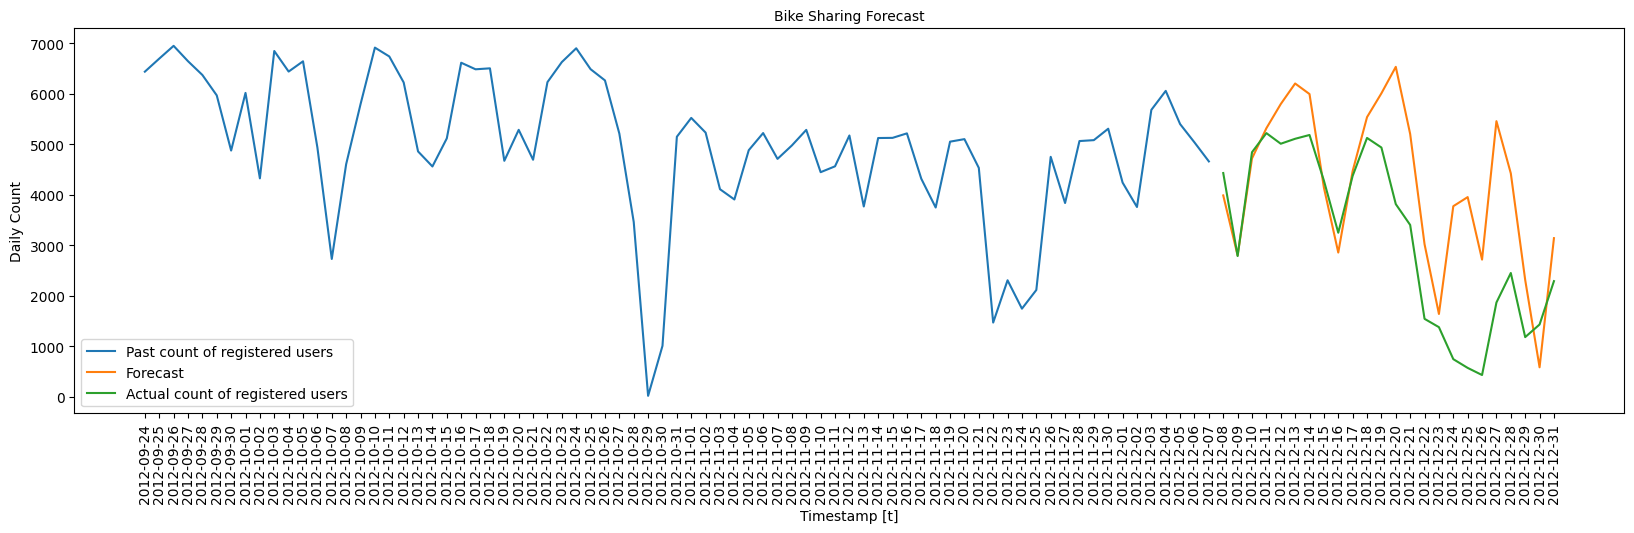

In [ ]:
Y_train_df.set_index('ds',inplace =True)
timegpt_fcst_ex_vars_df.set_index('ds',inplace =True)
Y_test_df_w_y.set_index('ds',inplace =True)
plt.figure(figsize=(20, 5))
y_past = Y_train_df["y"][-75:]
y_pred = timegpt_fcst_ex_vars_df['TimeGPT']
y_test = Y_test_df_w_y["y"]
plt.plot(y_past, label="Past count of registered users")
plt.plot(y_pred, label="Forecast")
plt.plot(y_test, label="Actual count of registered users")
plt.title('Bike Sharing Forecast', fontsize=10)
plt.ylabel('Daily Count', fontsize=10)
plt.xlabel('Timestamp [t]', fontsize=10)
#plt.tight_layout()
plt.xticks(rotation=90)
plt.legend();